In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, roc_auc_score
import pickle

## Entrenamiento de primer modelo

Cargamos los datos de train y test

In [2]:
df = pd.read_csv("../data/train/train.csv")
df.head()

,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
0,4.862270,2.471408,0,0,9.788456,0
1,28.316033,5.021810,0,0,2.873132,0
2,27.204428,3.819500,1,0,2.150132,0
3,6.177355,0.036686,0,0,2.570051,1
4,6.847389,9.246352,1,0,1.814942,1


In [3]:
X_train = df.drop(["Diagnosis"], axis=1)
y_train = df["Diagnosis"]

In [4]:
df_test = pd.read_csv("../data/test/test.csv")

In [5]:
X_test = df_test.drop(["Diagnosis"], axis=1)
y_test = df_test["Diagnosis"]

### Prueba de Logistic Regression

In [6]:
# Hacemos un modelo Logistic Regression con un max_iter de 5000 y comprobamos los resultados que nos da

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train) # Se entrena con X e y de la parte train

pred = lr.predict(X_test) # Se predice con X_test
scores = lr.predict_proba(X_test)[:,1]

print("TEST")
print("Recall:", recall_score(y_test, pred))
print("Accuracy:", accuracy_score(y_test, pred))    # Métricas con test
print("AUC:", roc_auc_score(y_test, scores))
print("CM:", confusion_matrix(y_test, pred))
print("Report:", classification_report(y_test, pred))

print("________________")

pred_train = lr.predict(X_train) # Se predice con X_train para comparar
scores_train = lr.predict_proba(X_train)[:,1]

print("TRAIN")
print("Recall:", recall_score(y_train, pred_train))
print("Accuracy:", accuracy_score(y_train, pred_train))    # Métricas con train
print("AUC:", roc_auc_score(y_train, scores_train))
print("CM:", confusion_matrix(y_train, pred_train))
print("Report:", classification_report(y_train, pred_train))

TEST
Recall: 0.7597402597402597
Accuracy: 0.8418604651162791
AUC: 0.9195134575569358
CM: [[245  31]
 [ 37 117]]
Report:               precision    recall  f1-score   support

           0       0.87      0.89      0.88       276
           1       0.79      0.76      0.77       154

    accuracy                           0.84       430
   macro avg       0.83      0.82      0.83       430
weighted avg       0.84      0.84      0.84       430

________________
TRAIN
Recall: 0.740924092409241
Accuracy: 0.8464223385689355
AUC: 0.9003955651629851
CM: [[1006  107]
 [ 157  449]]
Report:               precision    recall  f1-score   support

           0       0.87      0.90      0.88      1113
           1       0.81      0.74      0.77       606

    accuracy                           0.85      1719
   macro avg       0.84      0.82      0.83      1719
weighted avg       0.84      0.85      0.84      1719



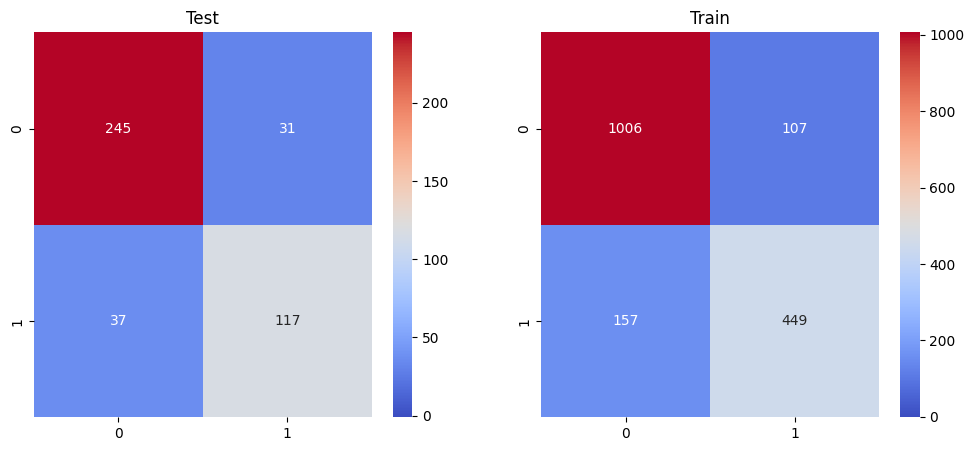

In [7]:
# Mapa de calor de la matriz de confusión de train y test, para que sea más visual

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, pred), annot=True, vmin=-1, cmap="coolwarm", fmt="d")
plt.title("Test")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_train, pred_train), annot=True, vmin=-1, cmap="coolwarm", fmt="d")
plt.title("Train");

Guardado del modelo con pickle

In [ ]:
pickle.dump(lr, open("../models/modelos_probados/01_modelo_lr.pkl", "wb"))